In [2]:
	
# python-poloniexのインストール
!pip3 install https://github.com/s4w3d0ff/python-poloniex/archive/v0.4.6.zip


    100% |████████████████████████████████| 92kB 3.5MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 4.2MB/s eta 0:00:01
    92% |█████████████████████████████▊  | 122kB 6.9MB/s eta 0:00:01    100% |████████████████████████████████| 133kB 2.9MB/s 
    100% |████████████████████████████████| 143kB 1.8MB/s eta 0:00:01
    100% |████████████████████████████████| 358kB 1.0MB/s ta 0:00:0111
  Running setup.py install for poloniex ... done


In [3]:
import poloniex


In [4]:
import time

# poloniex APIの準備
polo = poloniex.Poloniex()

# 5分間隔（サンプリング間隔300秒）で100日分読み込む
chart_data = polo.returnChartData('BTC_ETH', period=300, start=time.time()-polo.DAY*100, end=time.time())


In [5]:
chart_data


[{'close': '0.0998',
  'date': 1496244600,
  'high': '0.10038821',
  'low': '0.0988',
  'open': '0.099',
  'quoteVolume': '8822.42186365',
  'volume': '879.82832455',
  'weightedAverage': '0.09972639'},
 {'close': '0.09949001',
  'date': 1496244900,
  'high': '0.09988999',
  'low': '0.09921611',
  'open': '0.0998',
  'quoteVolume': '2394.108299',
  'volume': '238.2364421',
  'weightedAverage': '0.09950946'},
 {'close': '0.099',
  'date': 1496245200,
  'high': '0.09959999',
  'low': '0.098257',
  'open': '0.09949',
  'quoteVolume': '2540.44098179',
  'volume': '251.87120403',
  'weightedAverage': '0.09914467'},
 {'close': '0.09819008',
  'date': 1496245500,
  'high': '0.09899998',
  'low': '0.09809999',
  'open': '0.0989999',
  'quoteVolume': '3092.24927006',
  'volume': '304.1185099',
  'weightedAverage': '0.09834863'},
 {'close': '0.09727099',
  'date': 1496245800,
  'high': '0.09849999',
  'low': '0.0964',
  'open': '0.0981',
  'quoteVolume': '16518.58915423',
  'volume': '1606.23061

In [6]:
!pip3 install pandas

    100% |████████████████████████████████| 14.7MB 34kB/s eta 0:00:01    86% |███████████████████████████▉    | 12.8MB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 4.5MB 129kB/s ta 0:00:011
  Using cached pytz-2017.2-py2.py3-none-any.whl


In [7]:

# pandasのインポート
import pandas as pd
 
# pandasにデータの取り込み
df = pd.DataFrame(chart_data)

In [8]:


df.head(10)
1
df.head(10)

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.0998,1496244600,0.10038821,0.0988,0.099,8822.42186365,879.82832455,0.09972639
1,0.09949001,1496244900,0.09988999,0.09921611,0.0998,2394.108299,238.2364421,0.09950946
2,0.099,1496245200,0.09959999,0.098257,0.09949,2540.44098179,251.87120403,0.09914467
3,0.09819008,1496245500,0.09899998,0.09809999,0.0989999,3092.24927006,304.1185099,0.09834863
4,0.09727099,1496245800,0.09849999,0.0964,0.0981,16518.58915423,1606.23061307,0.09723776
5,0.09962181,1496246100,0.09991999,0.097,0.0971,7027.15761194,693.90647459,0.09874639
6,0.0989,1496246400,0.09980999,0.09833942,0.09962181,4761.06712469,471.24486643,0.09897883
7,0.09901001,1496246700,0.09959996,0.09850003,0.0988,3701.02238437,366.58910163,0.09905076
8,0.09899002,1496247000,0.09919998,0.09865488,0.09919995,1806.06961392,178.88344033,0.0990457
9,0.098401,1496247300,0.09899999,0.09830965,0.09899999,2260.94648906,222.95008601,0.09860918


In [9]:
df['close']


0            0.0998
1        0.09949001
2             0.099
3        0.09819008
4        0.09727099
5        0.09962181
6            0.0989
7        0.09901001
8        0.09899002
9          0.098401
10           0.0977
11       0.09796044
12       0.09887405
13       0.09840615
14       0.09843338
15            0.098
16       0.09799999
17        0.0982099
18       0.09815808
19           0.0979
20            0.098
21       0.09735003
22       0.09776007
23       0.09776498
24           0.0969
25         0.096055
26       0.09687335
27           0.0972
28         0.096626
29       0.09458001
            ...    
28770    0.07133359
28771    0.07138554
28772      0.071268
28773    0.07132002
28774    0.07147667
28775    0.07139218
28776    0.07127039
28777    0.07095403
28778    0.07043977
28779    0.06990608
28780          0.07
28781    0.07000806
28782          0.07
28783    0.06927102
28784       0.06911
28785    0.06932115
28786    0.06932286
28787    0.06922076
28788    0.07020797


In [10]:
data_s = pd.rolling_mean(df['close'], 12 * 24) 
 
# 長期線：窓幅5日（5分×12×24×5）
data_l = pd.rolling_mean(df['close'], 12 * 24 * 5)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=288,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).mean()
  after removing the cwd from sys.path.


In [11]:
data_s =Series.rolling(window=288,center=False).mean()
data_l= pd.rolling_mean(df['close'], 12 * 24 * 5)


NameError: name 'Series' is not defined

In [12]:
data_s =pd.rolling(window=288,center=False).mean()

AttributeError: 'module' object has no attribute 'rolling'

In [13]:
import matplotlib.pyplot as plt
 
# 一番簡単なプロット
plt.plot(df['close'])
plt.show()

ImportError: No module named 'matplotlib'

In [14]:
!pip3 install matplotlib


    100% |████████████████████████████████| 12.8MB 42kB/s eta 0:00:011 2% |▊                               | 296kB 3.4MB/s eta 0:00:04
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl


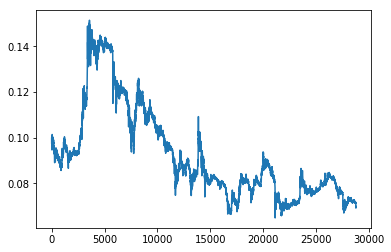

In [15]:
# matplotlibの読み込み（エラーが出た時はpip or pip3でインストール）
import matplotlib.pyplot as plt

# 一番簡単なプロット
plt.plot(df['close'])
plt.show()

In [16]:

# 描画を綺麗に表示する
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 6

ImportError: No module named 'seaborn'

In [17]:
!pip3 install seaborn


    100% |████████████████████████████████| 184kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 16.1MB 45kB/s eta 0:00:011 5% |█▊                              | 880kB 4.5MB/s eta 0:00:04
  Running setup.py install for seaborn ... done


In [18]:
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 6

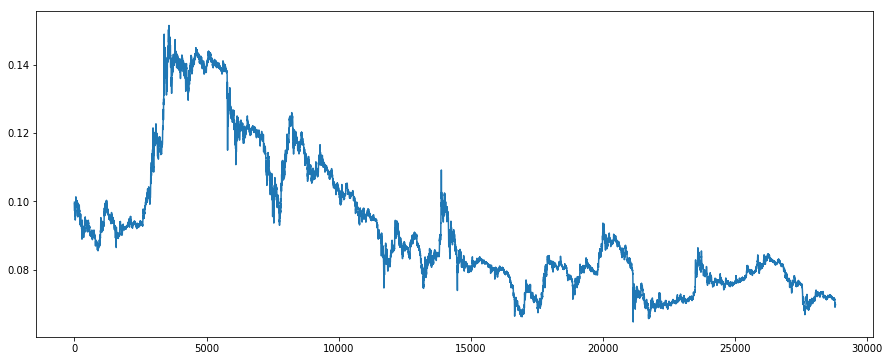

In [19]:
plt.plot(df['close'])
plt.show()

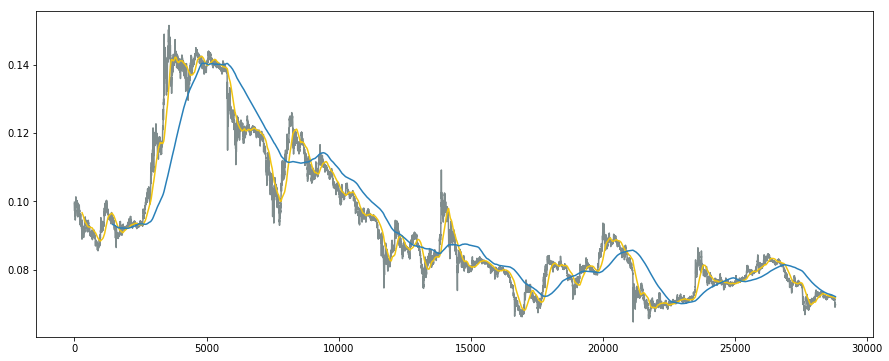

In [20]:
plt.plot(df['close'], color='#7f8c8d')
plt.plot(data_s, color='#f1c40f')  # 短期線
plt.plot(data_l, color='#2980b9')  # 長期線
plt.show()

In [21]:
chart_data = polo.returnChartData('BTC_ETH', period=3600, start=time.time()-polo.DAY*100, end=time.time())

PoloniexError: 3600 invalid candle period

In [22]:
chart_data = polo.returnChartData('BTC_ETH', period=1800, start=time.time()-polo.DAY*100, end=time.time())

In [23]:
data_s = pd.rolling_mean(df['close'], 25) 
 
# 長期線：窓幅5日（5分×12×24×5）
data_l = pd.rolling_mean(df['close'], 75
                        )

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).mean()
  after removing the cwd from sys.path.


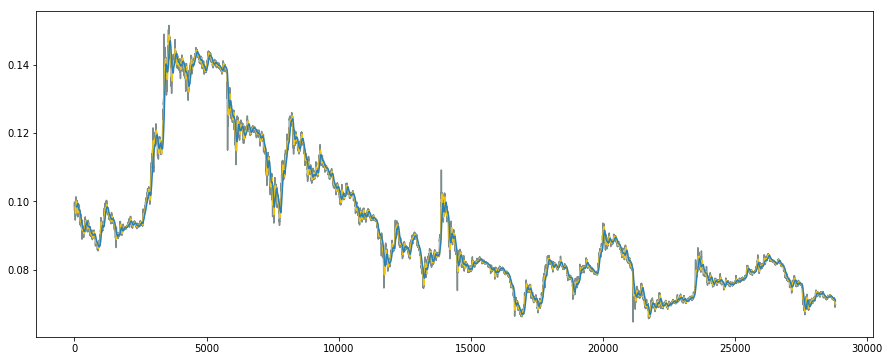

In [24]:
plt.plot(df['close'], color='#7f8c8d')
plt.plot(data_s, color='#f1c40f')  # 短期線
plt.plot(data_l, color='#2980b9')  # 長期線
plt.show()

In [25]:
df['close']

0            0.0998
1        0.09949001
2             0.099
3        0.09819008
4        0.09727099
5        0.09962181
6            0.0989
7        0.09901001
8        0.09899002
9          0.098401
10           0.0977
11       0.09796044
12       0.09887405
13       0.09840615
14       0.09843338
15            0.098
16       0.09799999
17        0.0982099
18       0.09815808
19           0.0979
20            0.098
21       0.09735003
22       0.09776007
23       0.09776498
24           0.0969
25         0.096055
26       0.09687335
27           0.0972
28         0.096626
29       0.09458001
            ...    
28770    0.07133359
28771    0.07138554
28772      0.071268
28773    0.07132002
28774    0.07147667
28775    0.07139218
28776    0.07127039
28777    0.07095403
28778    0.07043977
28779    0.06990608
28780          0.07
28781    0.07000806
28782          0.07
28783    0.06927102
28784       0.06911
28785    0.06932115
28786    0.06932286
28787    0.06922076
28788    0.07020797


In [26]:
clear

In [27]:
import time

# poloniex APIの準備
polo = poloniex.Poloniex()

# 5分間隔（サンプリング間隔300秒）で100日分読み込む
chart_data = polo.returnChartData('BTC_ETH', period=1800, start=time.time()-polo.DAY*100, end=time.time())

In [28]:
import pandas as pd
 
# pandasにデータの取り込み
df = pd.DataFrame(chart_data)

In [29]:
df['close']

0        0.0982099
1       0.09776498
2       0.09458001
3           0.0965
4       0.09610613
5           0.1002
6           0.1003
7       0.10007289
8          0.09925
9       0.10012999
10         0.10002
11      0.09911001
12      0.09920001
13      0.09950007
14       0.0996949
15        0.098495
16       0.0978187
17      0.09639989
18      0.09573924
19           0.097
20       0.0990408
21      0.09899568
22      0.09815001
23        0.096996
24          0.0965
25        0.097273
26      0.09755101
27      0.09770601
28       0.0974539
29      0.09710007
           ...    
4770    0.07199915
4771     0.0721203
4772    0.07206636
4773     0.0718411
4774    0.07163675
4775       0.07166
4776    0.07223783
4777         0.072
4778    0.07203408
4779    0.07192439
4780    0.07170943
4781    0.07177681
4782    0.07169756
4783     0.0716371
4784    0.07133152
4785    0.07139999
4786    0.07129336
4787     0.0715463
4788    0.07187162
4789      0.071685
4790     0.0716019
4791    0.07

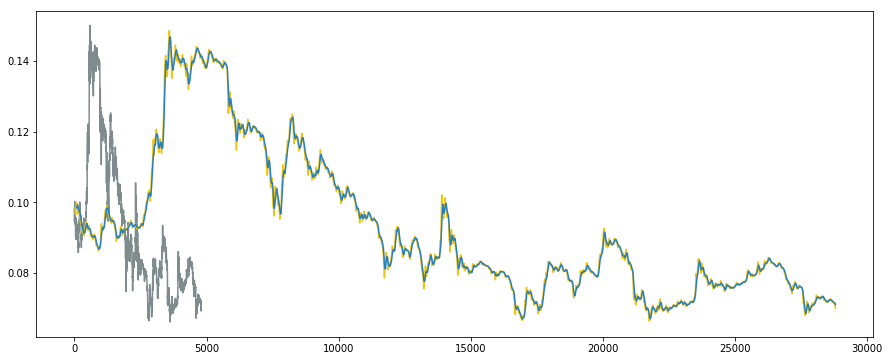

In [30]:
plt.plot(df['close'], color='#7f8c8d')
plt.plot(data_s, color='#f1c40f')  # 短期線
plt.plot(data_l, color='#2980b9')  # 長期線
plt.show()

In [31]:
data_s = pd.rolling_mean(df['close'], 25) 
 
# 長期線：窓幅5日（5分×12×24×5）
data_l = pd.rolling_mean(df['close'], 75
                        )

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).mean()
  after removing the cwd from sys.path.


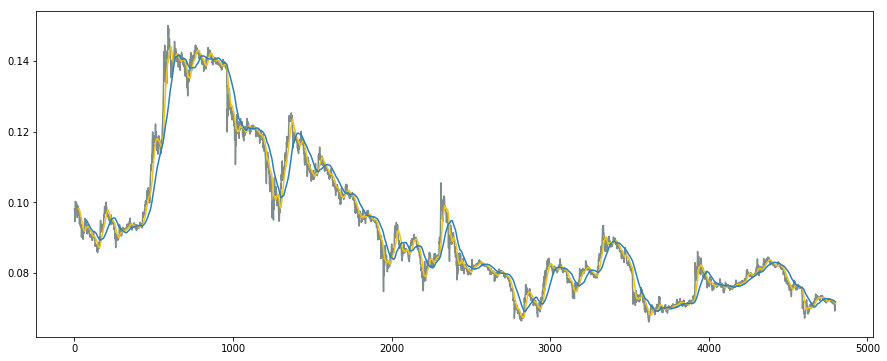

In [32]:
plt.plot(df['close'], color='#7f8c8d')
plt.plot(data_s, color='#f1c40f')  # 短期線
plt.plot(data_l, color='#2980b9')  # 長期線
plt.show()

In [33]:
df


,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.0982099,1496248200,0.09939996,0.0976,0.09796044,14374.52270553,1413.39914199,0.09832668
1,0.09776498,1496250000,0.09821698,0.0972,0.098212,13661.17086005,1336.41447139,0.09782576
2,0.09458001,1496251800,0.09808515,0.09458,0.09776497,38558.85675583,3711.99019566,0.09626816
3,0.0965,1496253600,0.097,0.0942,0.09458003,40731.36780552,3888.17521934,0.09545898
4,0.09610613,1496255400,0.09795409,0.0954067,0.0963,23962.815051,2313.76276426,0.09655638
5,0.1002,1496257200,0.1003,0.09600008,0.0961061,19094.54323124,1880.03886395,0.09845948
6,0.1003,1496259000,0.1025,0.09949999,0.10010011,34139.36020854,3441.83076663,0.10081708
7,0.10007289,1496260800,0.10149998,0.09981563,0.10021,15013.70292604,1505.77998433,0.10029371
8,0.09925,1496262600,0.10083695,0.09862638,0.1000001,17920.06591635,1786.71053586,0.09970446
9,0.10012999,1496264400,0.10029303,0.0991,0.09925,4689.77867814,467.01678604,0.09958183


In [34]:
(df['close']+df['open']+df['hight']+df['low'])/4

KeyError: 'hight'

In [35]:
(df['close']+df['open']+df['high']+df['low'])/4

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [36]:
df['close']


0        0.0982099
1       0.09776498
2       0.09458001
3           0.0965
4       0.09610613
5           0.1002
6           0.1003
7       0.10007289
8          0.09925
9       0.10012999
10         0.10002
11      0.09911001
12      0.09920001
13      0.09950007
14       0.0996949
15        0.098495
16       0.0978187
17      0.09639989
18      0.09573924
19           0.097
20       0.0990408
21      0.09899568
22      0.09815001
23        0.096996
24          0.0965
25        0.097273
26      0.09755101
27      0.09770601
28       0.0974539
29      0.09710007
           ...    
4770    0.07199915
4771     0.0721203
4772    0.07206636
4773     0.0718411
4774    0.07163675
4775       0.07166
4776    0.07223783
4777         0.072
4778    0.07203408
4779    0.07192439
4780    0.07170943
4781    0.07177681
4782    0.07169756
4783     0.0716371
4784    0.07133152
4785    0.07139999
4786    0.07129336
4787     0.0715463
4788    0.07187162
4789      0.071685
4790     0.0716019
4791    0.07

In [37]:
df['open']

0       0.09796044
1         0.098212
2       0.09776497
3       0.09458003
4           0.0963
5        0.0961061
6       0.10010011
7          0.10021
8        0.1000001
9          0.09925
10       0.1002153
11        0.100001
12      0.09939998
13      0.09944804
14      0.09950007
15      0.09969999
16        0.098495
17       0.0978187
18      0.09639989
19          0.0959
20      0.09700001
21       0.0990408
22      0.09899568
23      0.09826996
24        0.097004
25          0.0965
26          0.0972
27      0.09755101
28         0.09773
29       0.0974539
           ...    
4770    0.07207004
4771    0.07219991
4772    0.07209005
4773    0.07206633
4774    0.07187061
4775    0.07163675
4776       0.07166
4777    0.07228509
4778         0.072
4779     0.0721279
4780    0.07192439
4781    0.07170943
4782    0.07182438
4783    0.07163519
4784    0.07155825
4785    0.07133152
4786        0.0714
4787    0.07129335
4788    0.07141809
4789    0.07187161
4790      0.071685
4791    0.07

In [38]:
df[1]['open']

KeyError: 1

In [39]:
df['1']['open']

KeyError: '1'

In [40]:
df[-1]['open']

KeyError: -1

In [41]:
df[-1]['close']

KeyError: -1

In [42]:
df.head(10)

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.0982099,1496248200,0.09939996,0.0976,0.09796044,14374.52270553,1413.39914199,0.09832668
1,0.09776498,1496250000,0.09821698,0.0972,0.098212,13661.17086005,1336.41447139,0.09782576
2,0.09458001,1496251800,0.09808515,0.09458,0.09776497,38558.85675583,3711.99019566,0.09626816
3,0.0965,1496253600,0.097,0.0942,0.09458003,40731.36780552,3888.17521934,0.09545898
4,0.09610613,1496255400,0.09795409,0.0954067,0.0963,23962.815051,2313.76276426,0.09655638
5,0.1002,1496257200,0.1003,0.09600008,0.0961061,19094.54323124,1880.03886395,0.09845948
6,0.1003,1496259000,0.1025,0.09949999,0.10010011,34139.36020854,3441.83076663,0.10081708
7,0.10007289,1496260800,0.10149998,0.09981563,0.10021,15013.70292604,1505.77998433,0.10029371
8,0.09925,1496262600,0.10083695,0.09862638,0.1000001,17920.06591635,1786.71053586,0.09970446
9,0.10012999,1496264400,0.10029303,0.0991,0.09925,4689.77867814,467.01678604,0.09958183


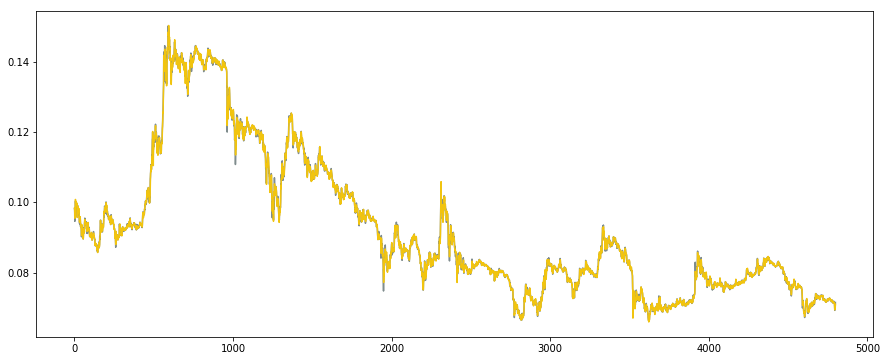

In [43]:
plt.plot(df['close'], color='#7f8c8d')
plt.plot(df['weightedAverage'], color='#f1c40f')  # 短期線
plt.show()

In [44]:
pd.DataFrame(d, index=['1'])

NameError: name 'd' is not defined

In [45]:
df[1]

KeyError: 1

In [46]:
df['1']

KeyError: '1'

In [47]:
chart_data

[{'close': '0.0982099',
  'date': 1496248200,
  'high': '0.09939996',
  'low': '0.0976',
  'open': '0.09796044',
  'quoteVolume': '14374.52270553',
  'volume': '1413.39914199',
  'weightedAverage': '0.09832668'},
 {'close': '0.09776498',
  'date': 1496250000,
  'high': '0.09821698',
  'low': '0.0972',
  'open': '0.098212',
  'quoteVolume': '13661.17086005',
  'volume': '1336.41447139',
  'weightedAverage': '0.09782576'},
 {'close': '0.09458001',
  'date': 1496251800,
  'high': '0.09808515',
  'low': '0.09458',
  'open': '0.09776497',
  'quoteVolume': '38558.85675583',
  'volume': '3711.99019566',
  'weightedAverage': '0.09626816'},
 {'close': '0.0965',
  'date': 1496253600,
  'high': '0.097',
  'low': '0.0942',
  'open': '0.09458003',
  'quoteVolume': '40731.36780552',
  'volume': '3888.17521934',
  'weightedAverage': '0.09545898'},
 {'close': '0.09610613',
  'date': 1496255400,
  'high': '0.09795409',
  'low': '0.0954067',
  'open': '0.0963',
  'quoteVolume': '23962.815051',
  'volume

In [48]:
chart_data['close']

TypeError: list indices must be integers, not str